In [1]:
from sklearn import datasets
iris = datasets.load_iris()

sklearn datasets are dictionaries containing the data as well as names of things

In [2]:
iris.keys()

dict_keys(['data', 'target', 'feature_names', 'target_names', 'DESCR'])

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

data stored in a matrix of shape (n_samples, n_features)

In [10]:
iris.data[:5,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [13]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

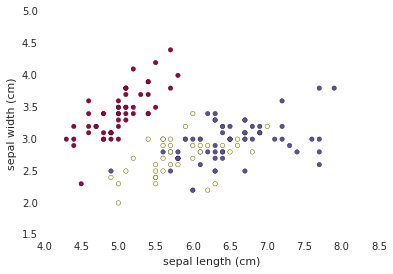

In [105]:
cm = plt.cm.Spectral
_ = df.plot(x=0, y=1, kind='scatter', c='target', colormap=cm, colorbar=False)

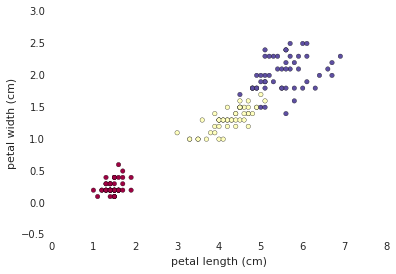

In [135]:
cm = plt.cm.Spectral
_ = df.plot(x=2, y=3, kind='scatter', c='target', colormap=cm, colorbar=False)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
clf = LogisticRegression()
features = df.iloc[:, [2, 3]]
features.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [109]:
clf.fit(features, df.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [110]:
clf.predict(features.head())

array([0, 0, 0, 0, 0])

In [111]:
clf.score(features, df.target)

0.87333333333333329

Let’s make a plot
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

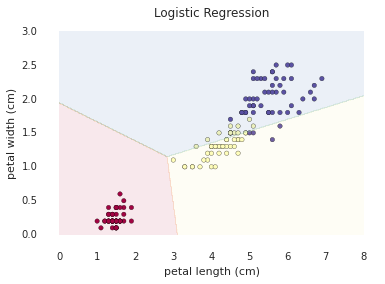

In [154]:
import numpy as np
# make a grid pf predictions to color plot background
h = 0.01
x_range = np.arange(0, 8, h)
y_range = np.arange(0, 3, h)
xx, yy = np.meshgrid(x_range, y_range)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape[0],xx.shape[1])

ax = df.plot(x=2, y=3, kind='scatter', c='target', cmap=cm, colorbar=False)
ax.contourf(x_range, y_range, Z, cmap=cm, alpha=.1)
plt.title('Logistic Regression')
plt.show()